In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cv2

## Question2: NumPy Warm-up

#### 1. Choose a few different one-dimensional Gaussian functions (by choosing different mean and variance values), plot them.

In [4]:
# plot one-dimensional Gaussian probability distribution function
def plot_gaussian_pdf(mu, sigma):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = np.exp(-(x - mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
    plt.plot(x, y)
    plt.show()
# choosing different mean and variance values, plot them
# plot_gaussian_pdf(0, 1)
# plot_gaussian_pdf(0, 2)
# plot_gaussian_pdf(0, 3)
# plot_gaussian_pdf(1, 1)
# plot_gaussian_pdf(1, 2)
# plot_gaussian_pdf(1, 3)

#### 2. Verify the above identity for each Gaussian function.

In [5]:
# Verify the identity ∫ G(x)dx = 1 for each Gaussian function
def gaussian_integral(mu, sigma):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = np.exp(-(x - mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
    return np.trapz(y, x)
print(gaussian_integral(0, 1))
print(gaussian_integral(0, 2))
print(gaussian_integral(0, 3))
print(gaussian_integral(1, 1))
print(gaussian_integral(1, 2))
print(gaussian_integral(1, 3))

0.9972920676269242
0.9972920676269242
0.997292067626924
0.9972920676269241
0.9972920676269242
0.997292067626924


## Question3: Numerics and Linear Algebra

#### 1. Use an LU solve to estimate the monomial coefficients $\vec{c}$. Report the residual L2 norm for both linear systems when N = 8 and N = 16.

In [6]:
# construct a n*n vandermonde matrix
def vandermonde_matrix(n):
    x = np.linspace(0, 1, n + 1)[:-1]
    return np.vander(x, n, increasing=True)
# construct a n*n finite Fourier Series basis matrix
# Fi,j−1 =
# {
#   sin (jπx_i), if 1 ≤ j ≤ N/2
#   cos ((j − N/2)πx_i), N/2 + 1 ≤ j ≤ N
# }
def fourier_basis_matrix(n):
    x = np.linspace(0, 1, n + 1)[:-1]
    y = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if j + 1 <= n/2:
                y[i][j] = np.sin((j + 1) * np.pi * x[i])
            else:
                y[i][j] = np.cos((j + 1 - n/2) * np.pi * x[i])
    return y
# print (vandermonde_matrix(8))
# print (fourier_basis_matrix(8))
# Use an LU solve (scipy.linalg.lu from SciPy package) to estimate the monomial coefficients. Report the residual L2 norm for both linear systems when N = 8 and N = 16.
def monomial_coefficients(n):
    # f(x) = 1 / (1 + x^2)
    x = np.linspace(0, 1, n + 1)[:-1]
    y = 1 / (1 + x**2)

    # use LU solve to estimate the monomial coefficients
    vm = vandermonde_matrix(n)
    fm = fourier_basis_matrix(n)
    vm_lu = sp.linalg.lu_factor(vm)
    fm_lu = sp.linalg.lu_factor(fm)
    vm_x = sp.linalg.lu_solve(vm_lu, y)
    fm_x = sp.linalg.lu_solve(fm_lu, y)
    # print("monomial coefficients when N = " + str(n) + ":")
    # print("vandermonde matrix: " + str(vm_x))
    # print("fourier basis matrix: " + str(fm_x))
    vm_y = np.dot(vm, vm_x)
    fm_y = np.dot(fm, fm_x)
    vm_r = np.linalg.norm(vm_y - y)
    fm_r = np.linalg.norm(fm_y - y)
    return vm_r, fm_r
print(monomial_coefficients(8))
print(monomial_coefficients(16))

(2.220446049250313e-16, 3.8459253727671276e-16)
(1.2560739669470201e-15, 1.1430445635548515e-15)


#### 2. Plot $N$ vs. $cond( V )$ and $N$ vs. $cond(F)$ for N = 4, 6, 8, ...32.

[163.42742324166863, 8215.649919892317, 450050.0666487678, 25681357.137469992, 1500717461.2546258, 89069186916.48735, 5344580147535.864, 323245758981552.2, 1.9496127860001332e+16, 1.620597993853218e+18, 1.786397875883056e+19, 6.358601189998436e+18, 8.239713325560794e+19, 7.556656808563421e+18, 4.5887143780777574e+18]
[5.02733949212585, 31.635891538074045, 236.58740928194547, 1918.313054823126, 16306.251662479055, 143030.8296855278, 1283150.6173285618, 11708033.664982196, 108251959.76479125, 1011580282.6936167, 9535670909.254139, 90545276003.46182, 865095433988.6373, 8309046218664.75, 80487025496112.38]


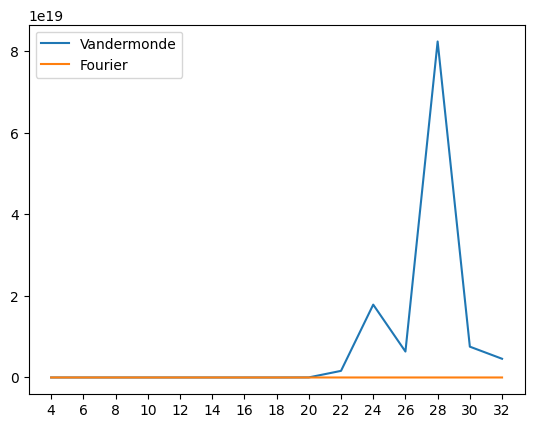

In [11]:
def plot_condition_number():
    x = np.linspace(4, 32, 15)
    y1 = []
    y2 = []
    for i in range(15):
        y1.append(np.linalg.cond(vandermonde_matrix(int(x[i]))))
        y2.append(np.linalg.cond(fourier_basis_matrix(int(x[i]))))
    print(y1)
    print(y2)
    plt.plot(x, y1, label='Vandermonde')
    plt.plot(x, y2, label='Fourier')
    plt.xticks(x)
    plt.legend()
    plt.show()
plot_condition_number()

##### explain the reasons for the trends in these two plots
As N increases, the condition number of Vandermonde matrix increases, and the condition number of Fourier basis matrix decreases. The reason is that the Vandermonde matrix is ill-conditioned, and the Fourier basis matrix is well-conditioned.

#### 3. Construct $A_V = V^T V$ and $A_F = F^T F$ for $N$ = 4, 6, . . . 32, and judge whether they are positive definite or not.

In [12]:
def is_positive_definite(n):
    vm = vandermonde_matrix(n)
    fm = fourier_basis_matrix(n)
    vm_t = np.transpose(vm)
    fm_t = np.transpose(fm)
    vm_a = np.dot(vm_t, vm)
    fm_a = np.dot(fm_t, fm)
    vm_r = np.all(np.linalg.eigvals(vm_a) > 0)
    fm_r = np.all(np.linalg.eigvals(fm_a) > 0)
    return vm_r, fm_r

for i in range(4, 33, 2):
    print("N = " + str(i) + ":" + str(is_positive_definite(i)))

N = 4:(True, True)
N = 6:(True, True)
N = 8:(True, True)
N = 10:(True, True)
N = 12:(True, True)
N = 14:(False, True)
N = 16:(False, True)
N = 18:(False, True)
N = 20:(False, True)
N = 22:(False, False)
N = 24:(False, True)
N = 26:(False, False)
N = 28:(False, False)
N = 30:(False, False)
N = 32:(False, False)


##### A table of values that includes the following columns: $N, isposdef(A_V ), isposdef(A_F ), cond(V ), cond(F)$

| N  | isposdef(A_V) | isposdef(A_F) | cond(V)  | cond(F)  |
|----|---------------|---------------|----------|----------|
| 4  | True          | True          | 163.4    | 5.027    |
| 6  | True          | True          | 8.215e3  | 31.64    |
| 8  | True          | True          | 4.5e5    | 236.6    |
| 10 | True          | True          | 2.568e7  | 1.918e3  |
| 12 | True          | True          | 1.5e9    | 1.631e4  |
| 14 | False         | True          | 8.906e10 | 1.43e5   |
| 16 | False         | True          | 5.345e12 | 1.283e6  |
| 18 | False         | True          | 3.232e14 | 1.171e7  |
| 20 | False         | True          | 1.95e16  | 1.083e8  |
| 22 | False         | False         | 1.621e18 | 1.012e9  |
| 24 | False         | True          | 1.786e19 | 9.536e9  |
| 26 | False         | False         | 6.359e18 | 9.055e10 |
| 28 | False         | False         | 8.24e19  | 8.651e11 |
| 30 | False         | False         | 7.557e18 | 8.309e12 |
| 32 | False         | False         | 4.589e18 | 8.049e13 |

##### Explain the reasons for the trends in the table

The largest value of $N$ where $A_V$ is positive definite: 12, the condition number of that $V$ : 1.5e9
The largest value of $N$ where $A_F$ is positive definite: 24, the condition number of that $F$ : 9.536e9
These condition numbers connected to the positive definiteness of the matrices. The larger the condition number, the more ill-conditioned the matrix is, and the more likely it is to be not positive definite. This is because the condition number is the ratio of the largest to the smallest singular value of the matrix. The larger the condition number, the more the matrix amplifies the error in the solution.


#### 4. For N = 8, transform the linear systems above into symmetric positive definite systems according to Question 3.3, and use Cholesky factorization to solve them. Report the residual L2 norm for each solution.

In [15]:
# transform the linear systems into symmetric positive definite systems and use Cholesky factorization to solve them
def cholesky_factorization(n):
    # f(x) = 1 / (1 + x^2)
    x = np.linspace(0, 1, n + 1)[:-1]
    y = 1 / (1 + x**2)

    vm = vandermonde_matrix(n)
    fm = fourier_basis_matrix(n)
    vm_t = np.transpose(vm)
    fm_t = np.transpose(fm)
    vm_a = np.dot(vm_t, vm)
    fm_a = np.dot(fm_t, fm)
    vm_b = np.dot(vm_t, y)
    fm_b = np.dot(fm_t, y)
    vm_c = sp.linalg.cho_factor(vm_a)
    fm_c = sp.linalg.cho_factor(fm_a)
    vm_x = sp.linalg.cho_solve(vm_c, vm_b)
    fm_x = sp.linalg.cho_solve(fm_c, fm_b)
    vm_y = np.dot(vm, vm_x)
    fm_y = np.dot(fm, fm_x)
    vm_r = np.linalg.norm(vm_y - y)
    fm_r = np.linalg.norm(fm_y - y)
    return vm_r, fm_r
print(cholesky_factorization(8))

(2.0202326468819256e-11, 2.0806242997996403e-14)


##### Compare the residuals to Question 3.1: how does Cholesky compare to LU?
The residual of Cholesky is bigger than LU. The reason is that the condition number of the Vandermonde matrix is very large, and the Cholesky factorization is not stable for ill-conditioned matrices.

## Least Squares Problems and QR

#### 1. Solve the least square system with QR decomposition when M = 16, N = 4, 8.

In [25]:
# construct a m*n vandermonde matrix
def vandermonde_matrix_mn(m,n):
    x = np.linspace(0, 1, m + 1)[:-1]
    return np.vander(x, n)
def fourier_basis_matrix_mn(m, n):
    x = np.linspace(0, 1, m + 1)[:-1]
    y = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if j + 1 <= n/2:
                y[i][j] = np.sin((j + 1) * np.pi * x[i])
            else:
                y[i][j] = np.cos((j + 1 - n/2) * np.pi * x[i])
    return y
# solve the least square system with QR decomposition by minimizing the 2-norm of the residual
def least_squares_qr(m, n):
    x = np.linspace(0, 1, m + 1)[:-1]
    y = 1 / (1 + x**2)
    vm = vandermonde_matrix_mn(m, n)
    fm = fourier_basis_matrix_mn(m, n)
    vm_q, vm_r = np.linalg.qr(vm)
    fm_q, fm_r = np.linalg.qr(fm)
    vm_qt = np.transpose(vm_q)
    fm_qt = np.transpose(fm_q)
    vm_b = np.dot(vm_qt, y)
    fm_b = np.dot(fm_qt, y)
    vm_x = sp.linalg.solve_triangular(vm_r, vm_b)
    fm_x = sp.linalg.solve_triangular(fm_r, fm_b)
    print(vm_x)
    print(fm_x)
    vm_y = np.dot(vm, vm_x)
    fm_y = np.dot(fm, fm_x)
    vm_r = np.linalg.norm(vm_y - y)
    fm_r = np.linalg.norm(fm_y - y)
    return vm_r, fm_r
print(least_squares_qr(16, 4))
print(least_squares_qr(16, 8))

[ 0.58215047 -1.06220587 -0.01392258  1.00103892]
[ 1.21467707 -0.11785824  0.35830956  0.48758784]
(0.00408323826729538, 0.30230113370126455)
[-3.12130078e-02  4.78868165e-01 -1.49113519e+00  1.69087565e+00
 -1.65663052e-01 -9.80828040e-01 -8.07368955e-04  1.00000139e+00]
[ 1.33778075 -0.1950913  -0.31748875  0.02996036  0.38439885  0.78902919
 -0.10683444 -0.06818281]
(1.341856782350059e-05, 0.008863804298810679)


#### 2. Plot the $g_V$ , $g_F$ when M = 16, N = 4, 8, compare them with the analytical function f(x) and the interpolation function obtained in Question 3.1.

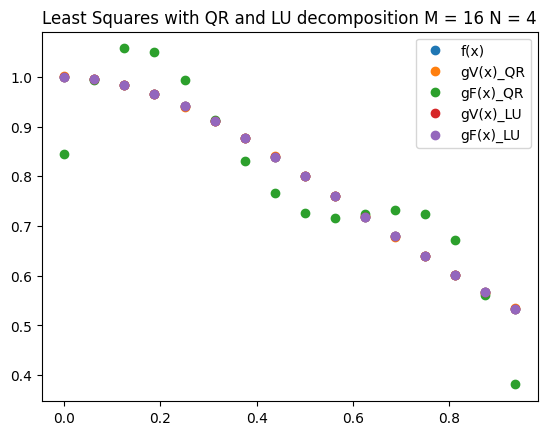

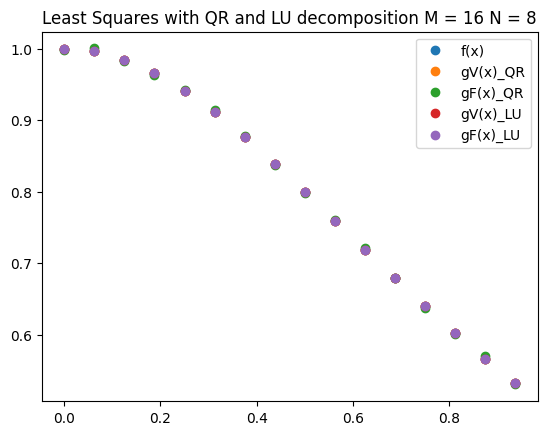

In [30]:
# plot the g_V and g_F when M = 16, N = 4, 8
def plot_least_squares_qr(m, n):
    x = np.linspace(0, 1, m + 1)[:-1]
    y = 1 / (1 + x**2)
    vm = vandermonde_matrix_mn(m, n)
    fm = fourier_basis_matrix_mn(m, n)

    # solve the least square system with QR decomposition by minimizing the 2-norm of the residual
    vm_q, vm_r = np.linalg.qr(vm)
    fm_q, fm_r = np.linalg.qr(fm)
    vm_qt = np.transpose(vm_q)
    fm_qt = np.transpose(fm_q)
    vm_b = np.dot(vm_qt, y)
    fm_b = np.dot(fm_qt, y)
    vm_x = sp.linalg.solve_triangular(vm_r, vm_b)
    fm_x = sp.linalg.solve_triangular(fm_r, fm_b)
    vm_y = np.dot(vm, vm_x)
    fm_y = np.dot(fm, fm_x)
    plt.plot(x, y, 'o', label='f(x)')
    plt.plot(x, vm_y, 'o', label='gV(x)_QR')
    plt.plot(x, fm_y, 'o', label='gF(x)_QR')

    # solve the least square system with LU decomposition by minimizing the 2-norm of the residual
    x = np.linspace(0, 1, m + 1)[:-1]
    y = 1 / (1 + x**2)
    vm = vandermonde_matrix(m)
    fm = fourier_basis_matrix(m)
    vm_lu = sp.linalg.lu_factor(vm)
    fm_lu = sp.linalg.lu_factor(fm)
    vm_x = sp.linalg.lu_solve(vm_lu, y)
    fm_x = sp.linalg.lu_solve(fm_lu, y)
    vm_y = np.dot(vm, vm_x)
    fm_y = np.dot(fm, fm_x)
    plt.plot(x, vm_y, 'o', label='gV(x)_LU')
    plt.plot(x, fm_y, 'o', label='gF(x)_LU')
    plt.legend()
    plt.title('Least Squares with QR and LU decomposition' + ' M = ' + str(m) + ' N = ' + str(n))
    plt.show()
plot_least_squares_qr(16, 4)
plot_least_squares_qr(16, 8)